## Import the numpy, pandas, matplotlib, seaborn packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [3]:
df = pd.read_csv("C:\\Users\\skhot\\OneDrive\\Desktop\\Practice\\Practice\\Uber\\Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Reading & exploring dataset

In [4]:
df.shape

(6745, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
len(df[df.duplicated()].index)

0

In [7]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
(df.isnull().sum()/df.shape[0])*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

## Check for NA values in each columns except "Driver id" and "Drop timestamp" (Cross Verification)

In [9]:
df["Request id"].isnull().values.any()
df["Request id"].isnull().values.sum()

0

In [10]:
df["Pickup point"].isnull().values.any()
df["Pickup point"].isnull().values.sum()

0

In [11]:
df["Status"].isnull().values.any()
df["Status"].isnull().values.sum()

0

In [12]:
df["Request timestamp"].isnull().values.any()
df["Request timestamp"].isnull().values.sum()

0

## Convert 'Request timestamp' column to datetime object

In [13]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


## Extract hour & day from Request timestamp

In [14]:
df["Request hour"]=df["Request timestamp"].dt.hour
df["Request day"]=df["Request timestamp"].dt.day
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


## Factor plot of hour and day w.r.t. status

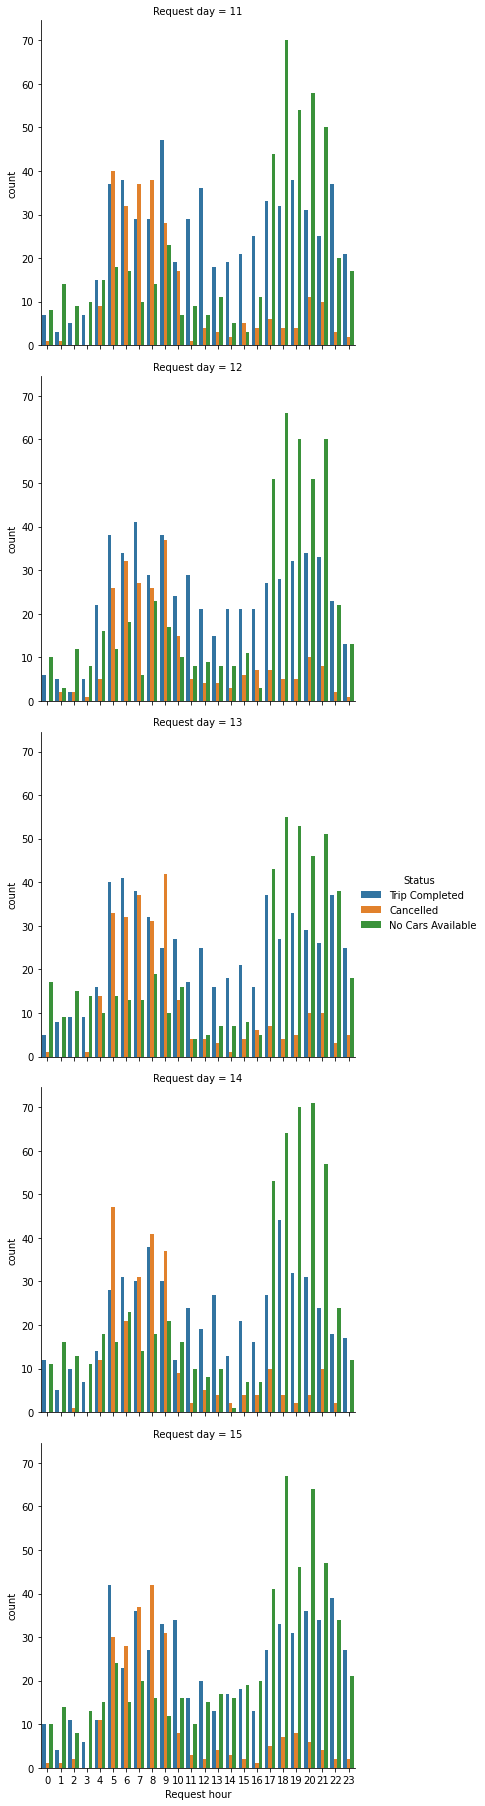

In [15]:
sns.factorplot(data = df , x="Request hour", hue= "Status", kind = "count", row = "Request day" )
plt.show()

## Factor plot of hour and day w.r.t. Pickup point

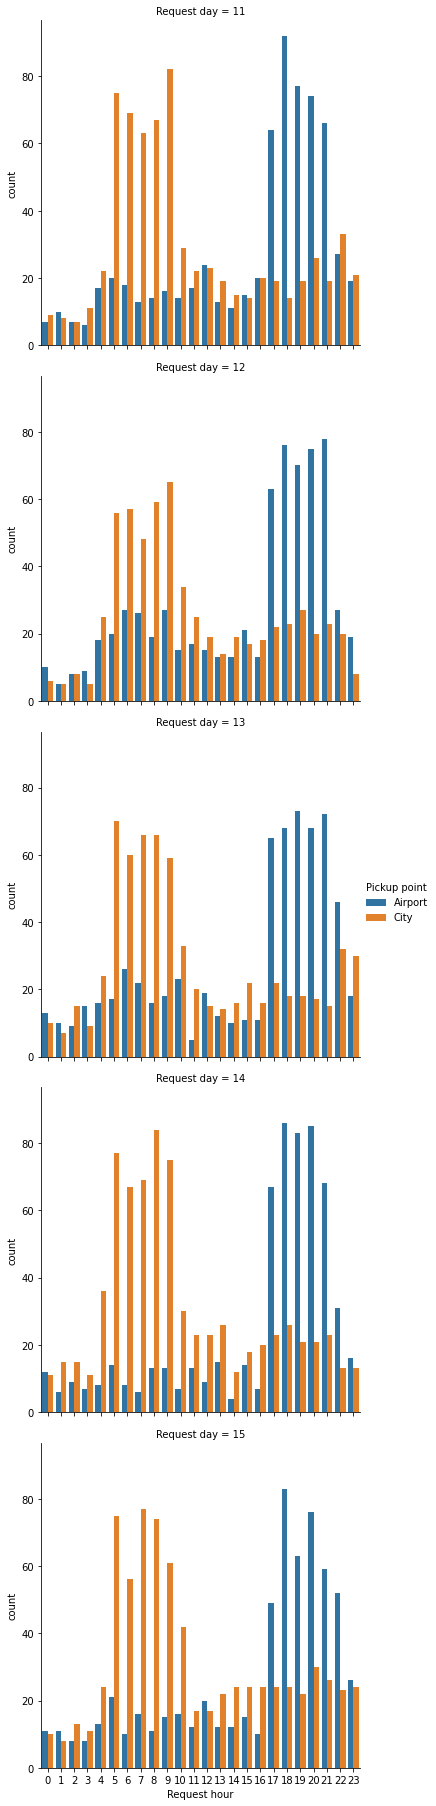

In [16]:
sns.factorplot(data = df , x="Request hour", hue= "Pickup point", kind = "count", row = "Request day" )
plt.show()

## creating a time slot for various time period of day

In [17]:
df.loc[df["Request hour"].between(0,4,inclusive=True),"Timeslot"]= "EarlyMorning"
df.loc[df["Request hour"].between(5,9,inclusive=True),"Timeslot"]= "Morning"
df.loc[df["Request hour"].between(10,14,inclusive=True),"Timeslot"]= "DayTime"
df.loc[df["Request hour"].between(17,21,inclusive=True),"Timeslot"]= "Evening"
df.loc[df["Request hour"].between(22,23,inclusive=True),"Timeslot"]= "Night"
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,DayTime
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning


In [18]:
df.Timeslot.value_counts()

Evening         2342
Morning         2103
DayTime          894
EarlyMorning     578
Night            498
Name: Timeslot, dtype: int64

## Check the count of request based on Pickup Point and status wise

In [19]:
df["Pickup point"].value_counts(normalize=True)

City       0.519941
Airport    0.480059
Name: Pickup point, dtype: float64

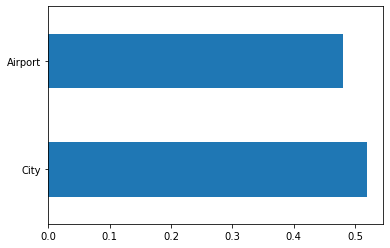

In [20]:
df["Pickup point"].value_counts(normalize=True).plot.barh()
plt.show()

In [21]:
df["Status"].value_counts(normalize=True)

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

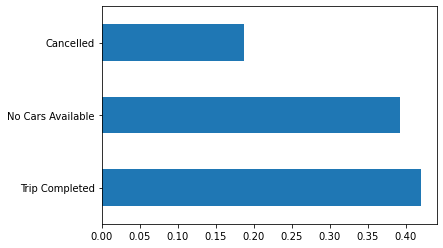

In [22]:
df["Status"].value_counts(normalize=True).plot.barh()
plt.show()

## Plot time slot w.r.t. status and identify the most critical Time slot

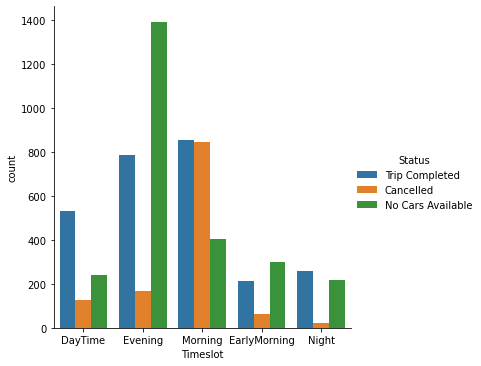

In [23]:
sns.factorplot(data = df , x="Timeslot", hue= "Status", kind = "count" )
plt.show()

We can see in the above plot the higest number of cancellations are in the "Morning" time slot

## Analysis of Morning Slot

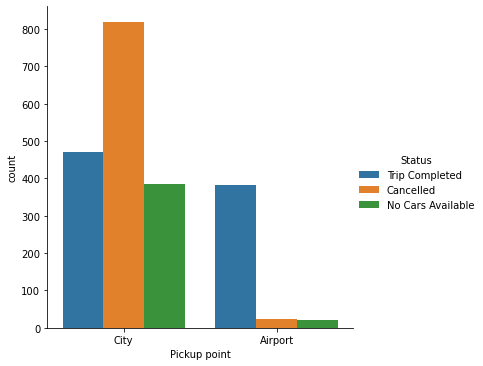

In [37]:
df_morning_slot = df[df["Timeslot"]=="Morning"]

sns.factorplot(data = df_morning_slot , x="Pickup point", hue= "Status", kind = "count",an)
plt.show()

In [48]:
df_airport_cancelation = df_morning_slot.loc[(df_morning_slot["Pickup point"]=="Airport") & (df_morning_slot["Status"]=="Cancelled")]
len(df_morning_cancelation.index)

23

In [47]:
df_city_cancelation = df_morning_slot.loc[(df_morning_slot["Pickup point"]=="City") & (df_morning_slot["Status"]=="Cancelled")]
len(df_city_cancelation.index)

820

In [49]:
df_city_completed = df_morning_slot.loc[(df_morning_slot["Pickup point"]=="City") & (df_morning_slot["Status"]=="Trip Completed")]
len(df_city_completed.index)

472

In [50]:
df_city_supply = df_morning_slot.loc[(df_morning_slot["Pickup point"]=="City")]
len(df_city_supply.index)

1677

In [51]:
df_Airport_completed = df_morning_slot.loc[(df_morning_slot["Pickup point"]=="Airport") & (df_morning_slot["Status"]=="Trip Completed")]
len(df_Airport_completed.index)

382

In [54]:
df_airport_supply = df_morning_slot.loc[(df_morning_slot["Pickup point"]=="Airport")]
len(df_airport_supply.index)

426

## Analysis of Evening Slot

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

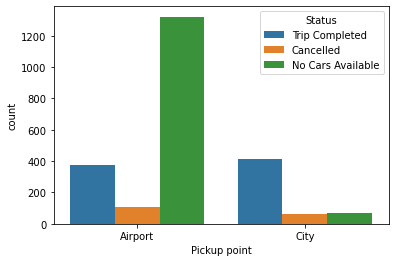

In [60]:
df_evening_slot = df[df.Timeslot=="Evening"]
sns.countplot(x="Pickup point", hue="Status", data = df_evening_slot)

In [62]:
df_city_completed_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="City") & (df_evening_slot['Status']=="Trip Completed")]
len(df_city_completed_evening.index)

411

In [63]:
df_city_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="City")]
len(df_city_evening.index)

542

In [64]:
df_airport_completed_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="Airport") & (df_evening_slot['Status']=="Trip Completed")]
len(df_airport_completed_evening.index)

373

In [66]:
df_airport_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="Airport")]
len(df_airport_evening.index)                                         

1800

In [67]:
df_airport_cancelled_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="Airport") & (df_evening_slot['Status']=="Cancelled")]
len(df_airport_cancelled_evening.index)

106

In [68]:
df_city_cancelled_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="City") & (df_evening_slot['Status']=="Cancelled")]
len(df_city_cancelled_evening.index)

60

In [69]:
df_airport_nocars_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="Airport") & (df_evening_slot['Status']=="No Cars Available")]
len(df_airport_nocars_evening.index)

1321

In [70]:
df_city_nocars_evening = df_evening_slot.loc[(df_evening_slot['Pickup point']=="City") & (df_evening_slot['Status']=="No Cars Available")]
len(df_city_nocars_evening.index)

71